# Circular task (by Malo, Hugo and Yann, and copilot)

## mporting libraries

In [19]:
# Set up the environment without pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches 


## Import file and data

In [20]:
# 1/ Load the data
FILE = "data.csv"
# Load full dataset
full_data = np.genfromtxt(FILE, delimiter=';', skip_header=3, names=True)
# Keep only the useful columns
blank = full_data[['timestamp', 'mouseX', 'mouseY', 'mouseInTarget']]

## Print header and infos

In [21]:
#print header of the files
with open(FILE, 'r', encoding='utf-8') as f:
    firstLine = f.readline().strip()

if firstLine : 
    data = firstLine.split(';')
    print("Head line information in 001MoDe_R1.csv:")
    for d in data : 
        print(" " + d.strip())

#print marker infos from line 4 to 26 and column 2 to 9
marker_file = FILE
with open(marker_file, 'r', encoding='utf-8') as f:
    lines = f.readlines()[3:26]
    print("\nMarker information in the file.csv:")
    for line in lines:
        data = line.strip().split(';')[1:9]
        print(" ".join(data))

Head line information in 001MoDe_R1.csv:
 software
 mouseReMoCo
 
 
 screenHeight 995
 centerX 953
 centerY 497
 autoStart 3600
 cycleMaxNumber 6
 cycleDuration 20
 borderColor java.awt.Color[r=255,g=255,b=255]
 textColor java.awt.Color[r=255,g=255,b=255]
 backgroundColor java.awt.Color[r=0,g=0,b=0]
 cursorColorRecord java.awt.Color[r=255,g=0,b=0]
 cursorColorWait java.awt.Color[r=255,g=255,b=0]
 task circular
 cornerX 536
 cornerY 80
 externalRadius 417
 internalRadius 337
 borderRadius 1
 cursorRadius 16
 indexOfDifficulty 50.33232485432158
 taskRadius 376.5
 taskTolerance 47

Marker information in the file.csv:
mouseX mouseY mouseInTarget     
956 127 1     
952 127 1     
948 127 1     
945 127 1     
933 127 1     
931 127 1     
928 127 1     
926 127 1     
924 127 1     
922 127 1     
921 127 1     
919 127 1     
917 127 1     
916 127 1     
915 127 1     
914 127 1     
913 128 1     
911 128 1     
909 128 1     
907 128 1     
905 129 1     
902 129 1     


## Extract values

In [22]:
# extract arrays
mX = np.array(blank['mouseX'], dtype=np.int64)
mY = np.array(blank['mouseY'], dtype=np.int64)
timestamp = np.array(blank['timestamp'], dtype=np.int64)

# Center coordinates reference
def find_value_in_csv(data, key, sep=","):
    with open(data, "r", encoding="utf-8") as f:
        for row_idx, line in enumerate(f):
            cols = line.strip().split(sep)
            for col_idx, cell in enumerate(cols):
                if key in cell:
                    return cell
    return None


def extract_numeric_value(cell, key):
    if cell is None:
        return None

    parts = cell.replace(";", " ").split()

    for i in range(len(parts) - 1):
        if parts[i] == key:
            try:
                return float(parts[i + 1])
            except:
                return None
    return None


raw_centerX = find_value_in_csv(FILE, "centerX")
raw_centerY = find_value_in_csv(FILE, "centerY")

CENTER_X = extract_numeric_value(raw_centerX, "centerX")
CENTER_Y = extract_numeric_value(raw_centerY, "centerY")
Xc = mX - CENTER_X
Yc = mY - CENTER_Y

x_vals = np.array(blank['mouseX'])
y_vals = np.array(blank['mouseY'])

## Separate the different records

In [23]:
#seperate records 
def get_column(filepath, col="A", sep=","):
    col_index=0
    for char in col.upper():
        col_index = col_index * 26 + (ord(char) - ord('A') + 1)
    col_index -= 1

    values = []
    with open(filepath, "r", encoding = "utf-8") as f:
        lines = f.readlines()
    
    for line in lines:
        cols = line.strip().split(sep)
        if col_index < len(cols):
            values.append(cols[col_index])
        else:
            values.append("")
    return values

#apply records to time stamps: robust numpy-based detection + extractor
import numpy as np

def find_records(ts):
    ts_arr = np.asarray(ts, dtype=np.int64)
    if ts_arr.size == 0:
        return []

    mask = ts_arr != 0
    if not mask.any():
        return []

    edges = np.diff(mask.astype(int))
    starts = np.where(edges == 1)[0] + 1
    ends = np.where(edges == -1)[0] + 1

    if mask[0]:
        starts = np.concatenate(([0], starts)) if starts.size else np.array([0])
    if mask[-1]:
        ends = np.concatenate((ends, [len(mask)])) if ends.size else np.array([len(mask)])

    records = list(zip(starts.tolist(), ends.tolist()))
    return records

records = find_records(timestamp)
print(f'Found {len(records)} record(s): {records}')

def extract_record_times(start_idx, end_idx):
    """Return (T_rel_seconds, Xc_slice, Yc_slice, target_slice) for indices [start_idx:end_idx]."""
    t_slice = np.asarray(timestamp[start_idx:end_idx], dtype=np.int64)
    if t_slice.size == 0:
        return (np.array([]), np.array([]), np.array([]), np.array([]))
    T_rel = (t_slice - t_slice[0]) / 1000.0  # seconds relative to segment start
    Xc_slice = Xc[start_idx:end_idx]
    Yc_slice = Yc[start_idx:end_idx]
    target_slice = np.asarray(blank['mouseInTarget'])[start_idx:end_idx]
    return (T_rel, Xc_slice, Yc_slice, target_slice)

Found 7 record(s): [(0, 2053), (2054, 3988), (3989, 5851), (5852, 7959), (7960, 9929), (9930, 12337), (12338, 12370)]


## Plotting the circular graph

Generating plot for Record 0...


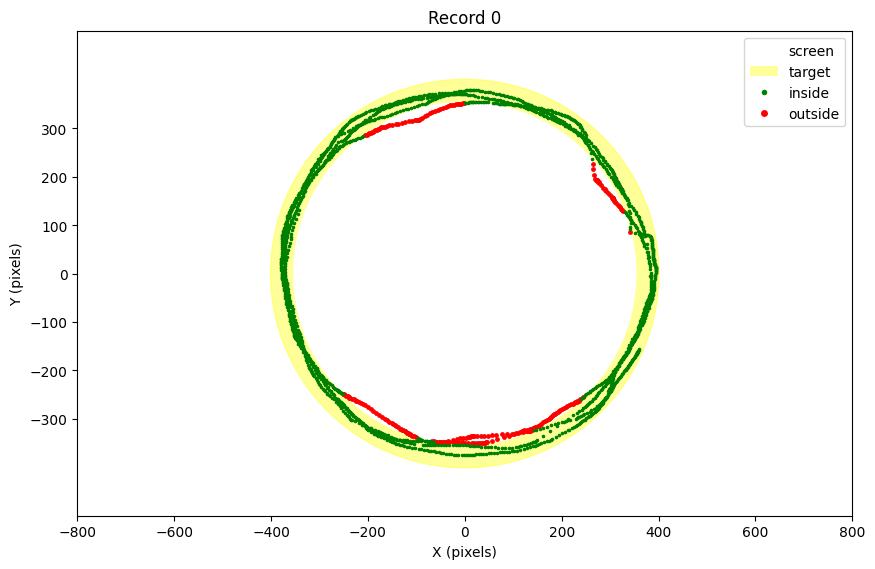

Generating plot for Record 1...


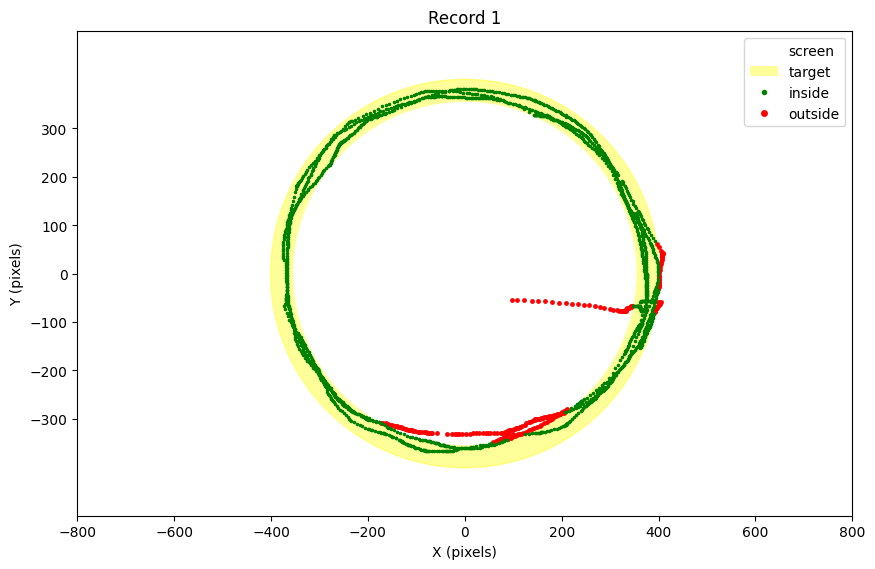

Generating plot for Record 2...


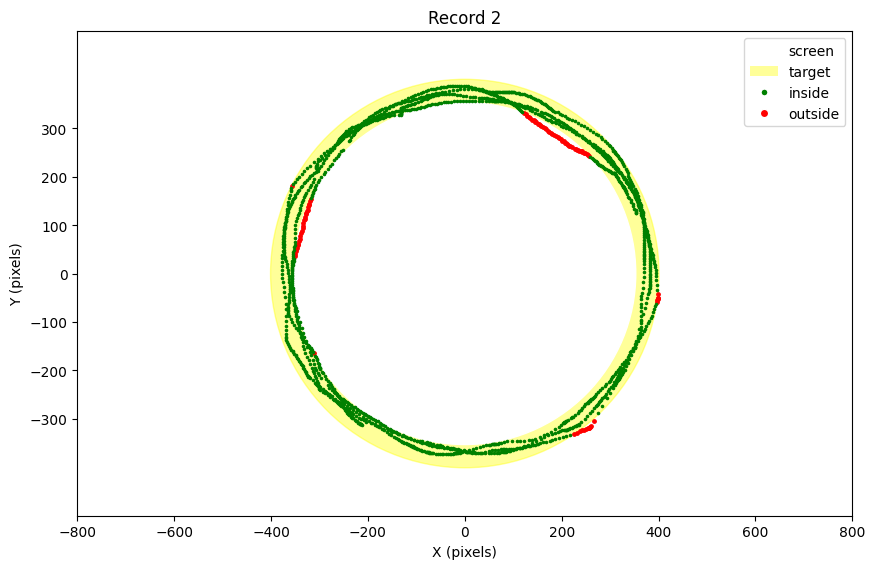

Generating plot for Record 3...


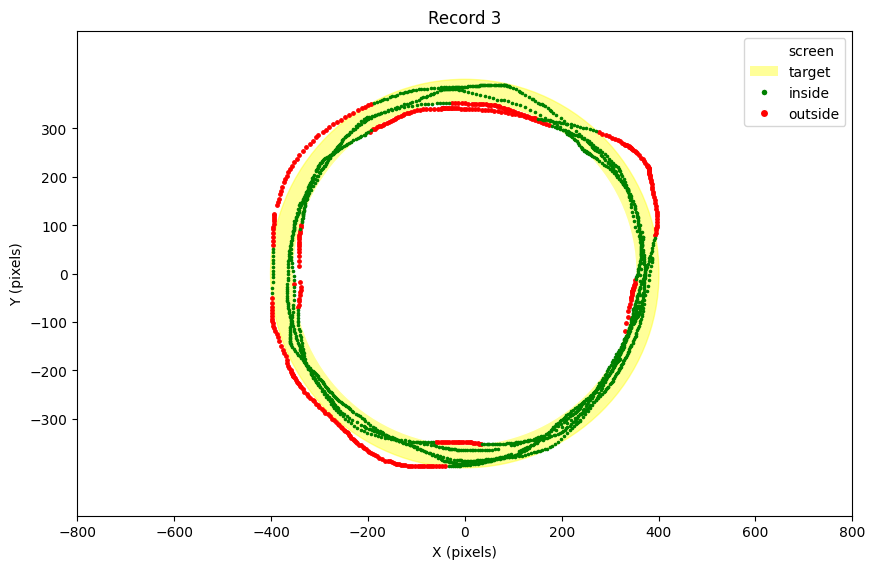

Generating plot for Record 4...


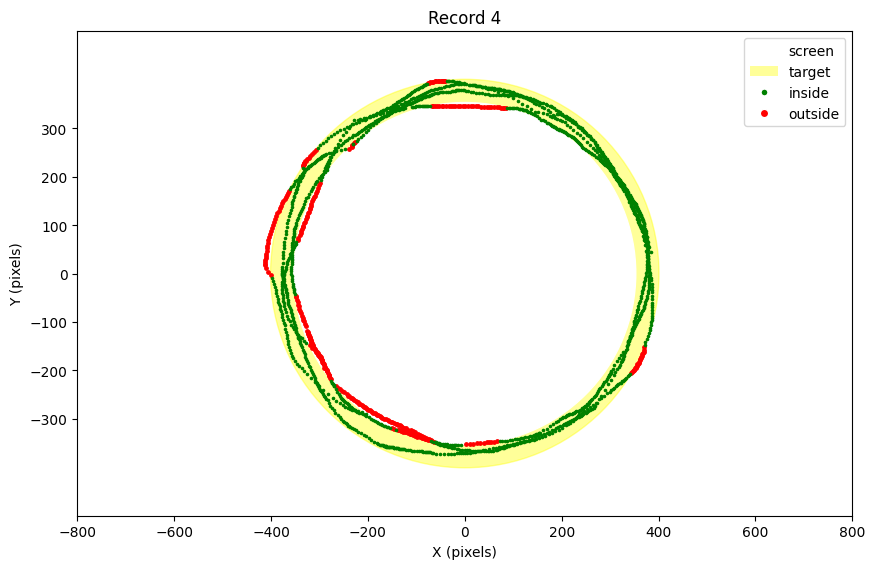

Generating plot for Record 5...


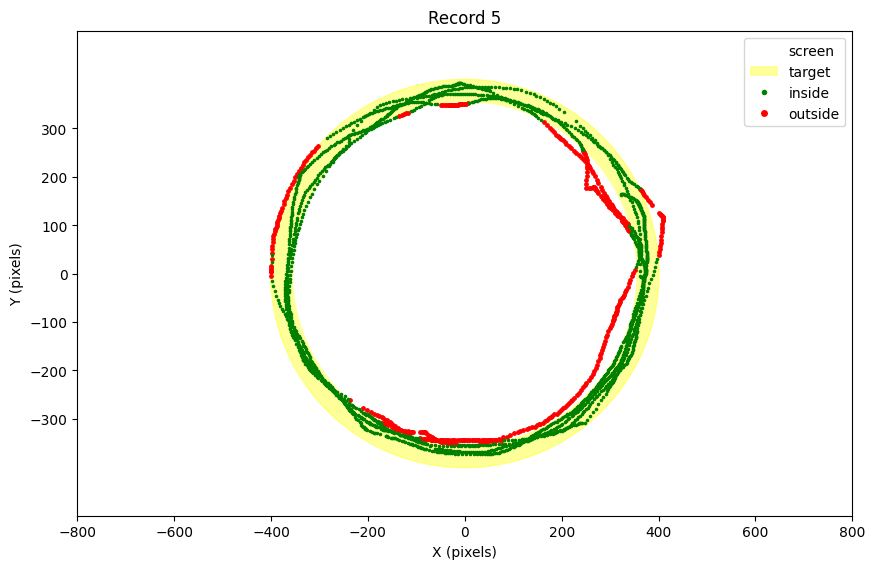

Generating plot for Record 6...


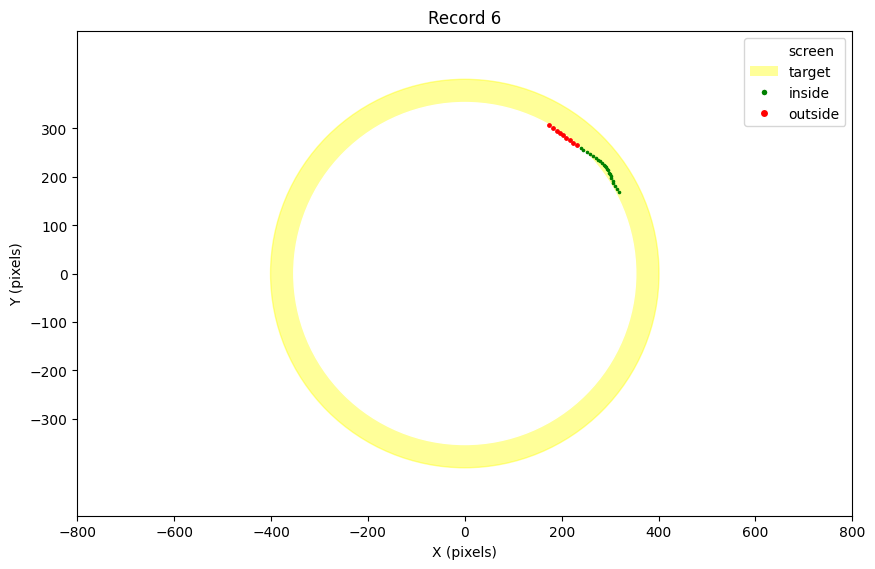

In [ ]:
from matplotlib.lines import Line2D

# Common visual settings
params = {
    'centerX': 552, 'centerY': 330, 
    'externalRadius': 250, 'internalRadius': 170, 'cursorRadius': 16,
    'screenWidth': 1104, 'screenHeight': 661
}
try:
    with open(FILE, 'r') as f:
        header = f.readline().strip()
    for part in header.split(';'):
        if ' ' in part:
            k, v = part.strip().split(' ', 1)
            try: params[k] = float(v)
            except: pass
except: pass
cx, cy = params.get('centerX', 0), params.get('centerY', 0)
sw, sh = params.get('screenWidth', 1104), params.get('screenHeight', 661)
r_ext = params.get('externalRadius', 250) - params.get('cursorRadius', 16)
r_int = params.get('internalRadius', 170) + params.get('cursorRadius', 16)

# Loop through each detected record
# Enumeration starts at 0 (Record 0, Record 1...)
for i, rec_data in enumerate(records):
    
    print(f"Generating plot for Record {i}...")
    
    # rec_data is a (start_idx, end_idx) tuple -> slice arrays accordingly
    start_idx, end_idx = rec_data

    # Use the helper that was defined earlier to get relative time, centered coords and target mask
    T_rel, Xc_slice, Yc_slice, target = extract_record_times(start_idx, end_idx)

    # Prepare plotting arrays: Xc_slice is already centered; invert Y to match Cartesian plotting
    x = np.asarray(Xc_slice)
    y = -np.asarray(Yc_slice)
    target = np.asarray(target)

    # Split Valid (Green) / Invalid (Red)
    mask_ok = (target == 1)
    x_ok, y_ok = x[mask_ok], y[mask_ok]
    x_ko, y_ko = x[~mask_ok], y[~mask_ok]
    
    # --- PLOTTING ---
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # 1. Screen (Pink Outline)
    rect = patches.Rectangle((-sw/2, -sh/2), sw, sh, fill=False, edgecolor="#FFFFFF", linewidth=1, zorder=1)
    ax.add_patch(rect)
    
    # 2. Target (Yellow Background)
    ax.add_patch(plt.Circle((0,0), r_ext, color='yellow', alpha=0.4, zorder=0))
    ax.add_patch(plt.Circle((0,0), r_int, color='white', zorder=0))
    
    # 3. Points
    if x_ko.size > 0: ax.scatter(x_ko, y_ko, c='red', s=6, zorder=2)
    if x_ok.size > 0: ax.scatter(x_ok, y_ok, c='green', s=2.5, zorder=3)
    
    # 4. Formatting
    ax.set_xlim(-800, 800)
    ax.set_ylim(-500, 500)
    ax.set_yticks(np.arange(-300, 301, 100))
    ax.set_aspect('equal')
    
    # Title and Labels in English
    ax.set_title(f"Record {i}")
    ax.set_xlabel("X (pixels)")
    ax.set_ylabel("Y (pixels)")
    
    # Legend in English
    legend_elements = [
        patches.Patch(facecolor='none', edgecolor="#FFFFFF", label='screen'),
        patches.Patch(facecolor='yellow', alpha=0.4, label='target'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=5, label='inside'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=6, label='outside')
    ]
    ax.legend(handles=legend_elements, loc='upper right')
    
    plt.show()

## Plotting Position over time graphs 

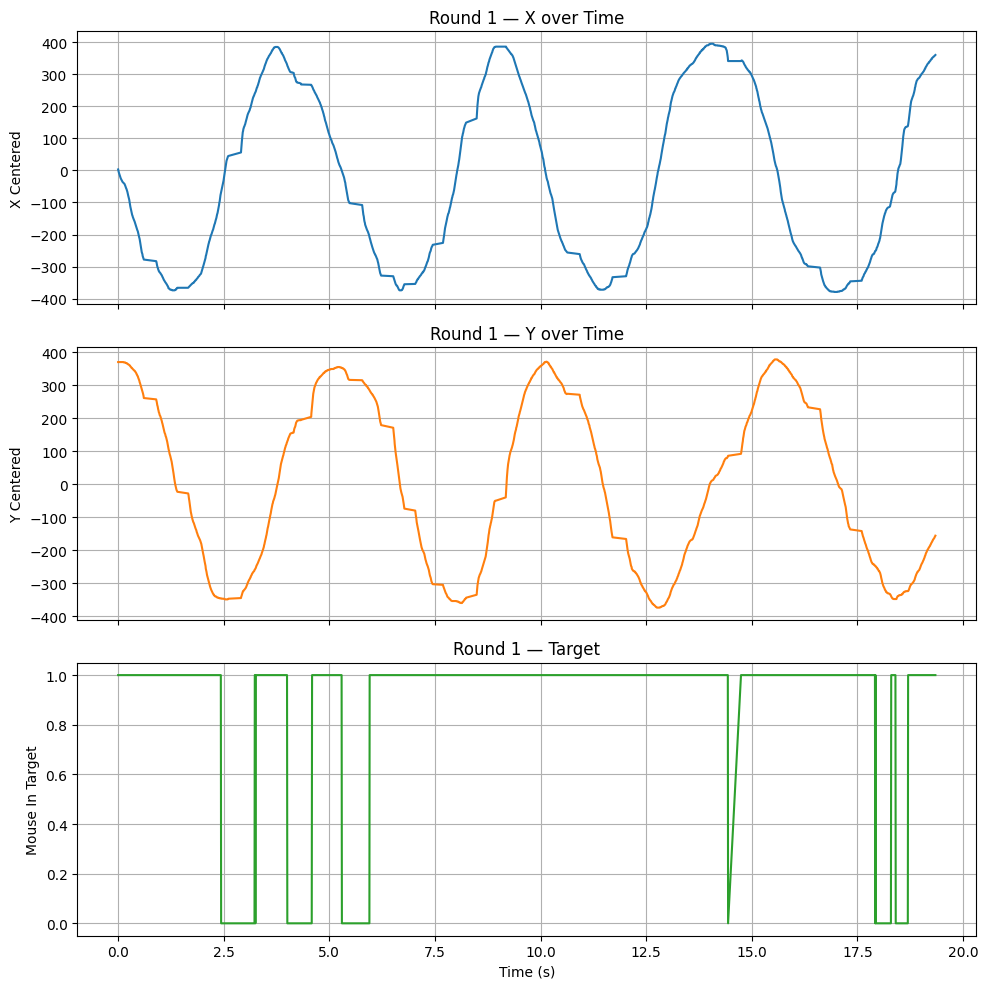

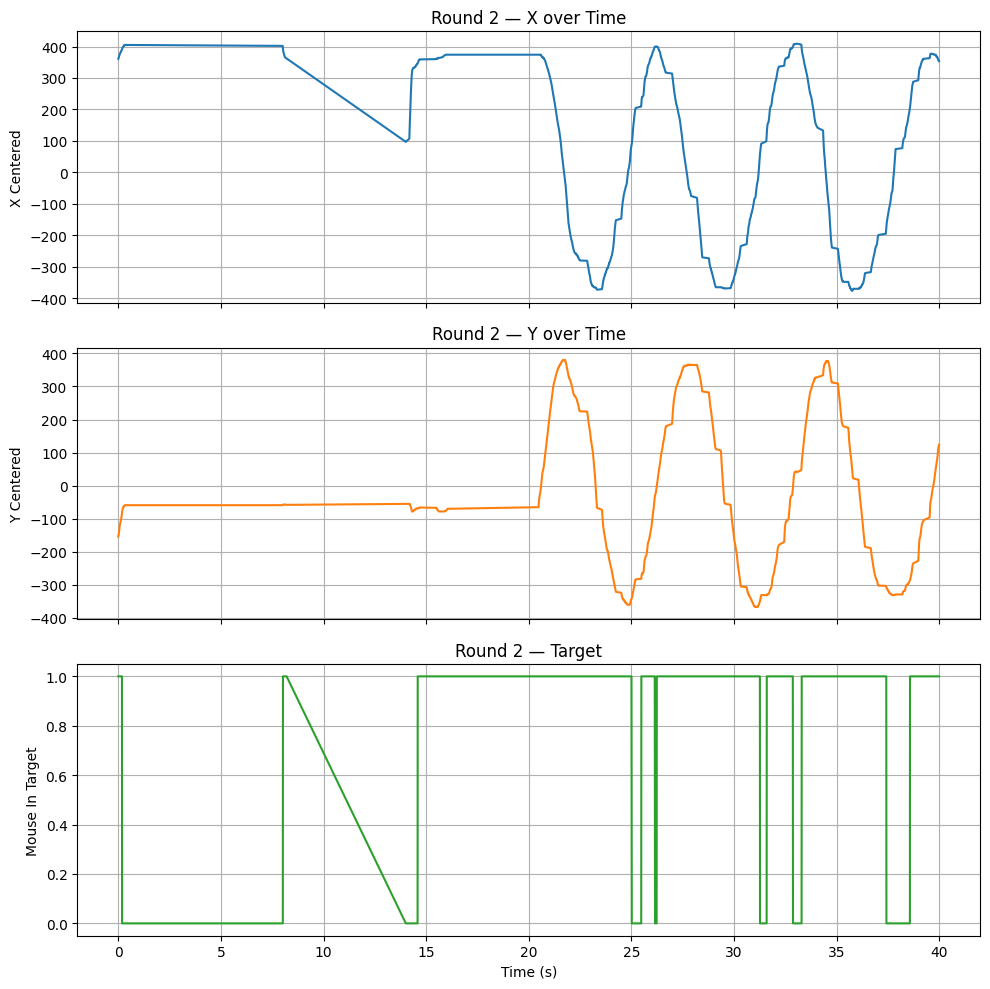

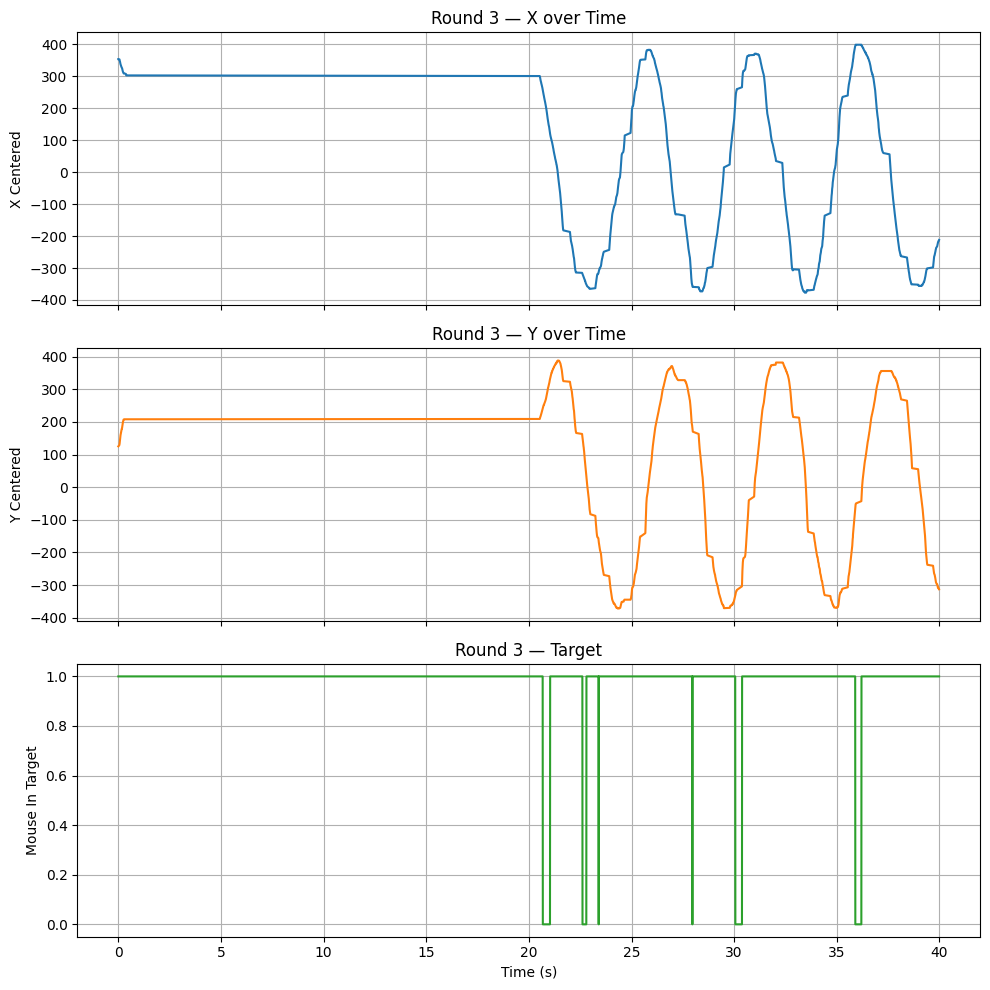

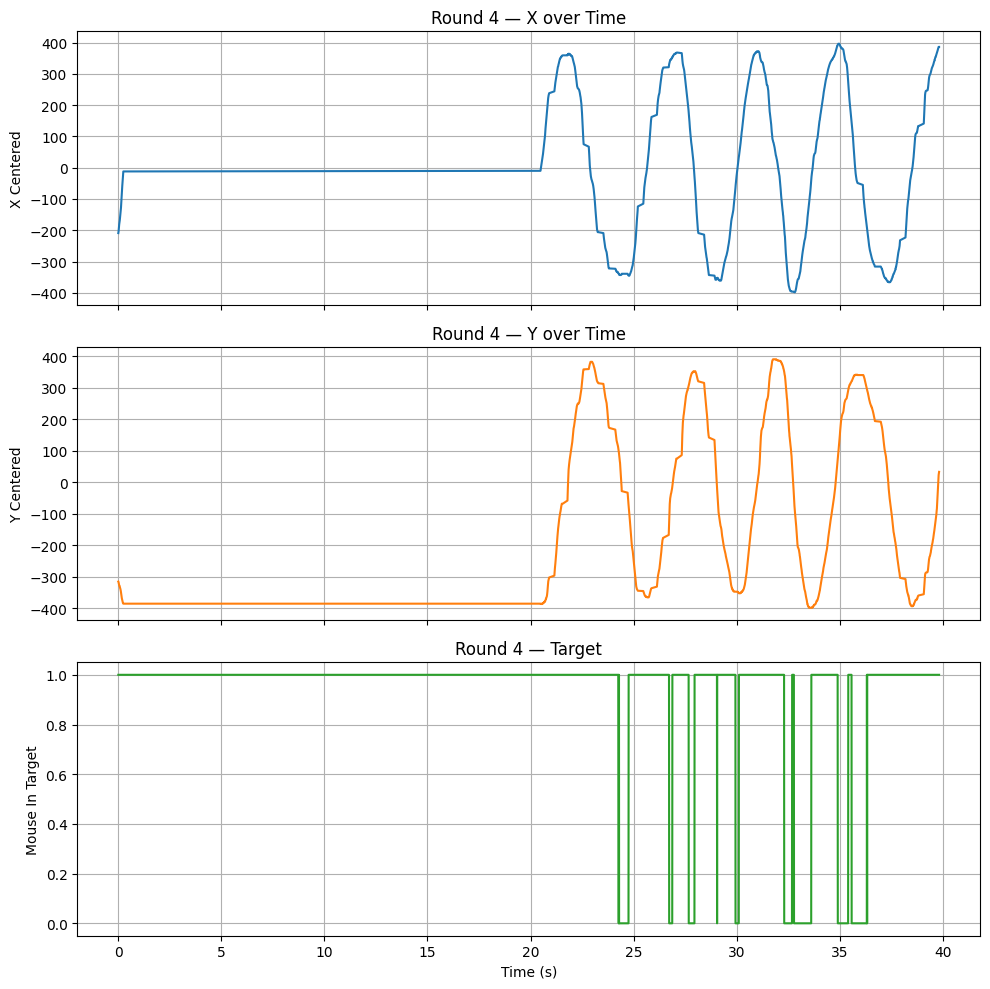

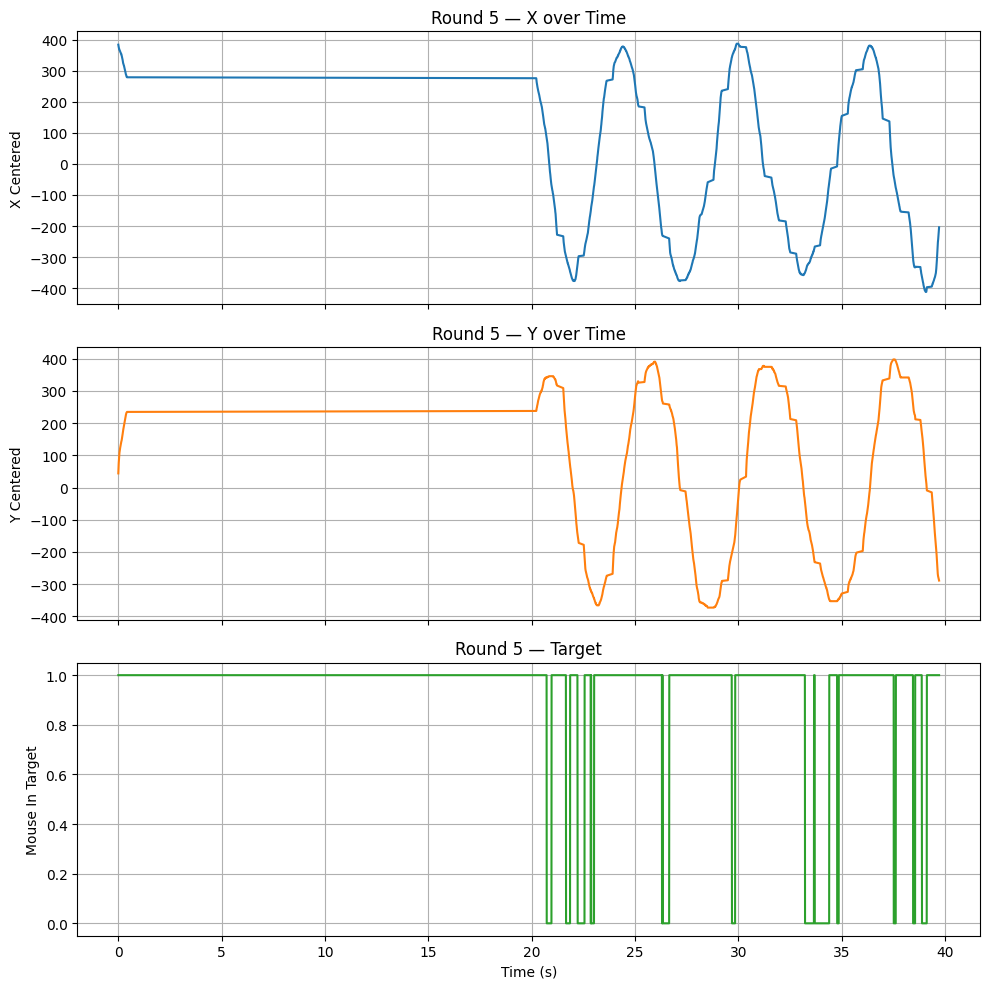

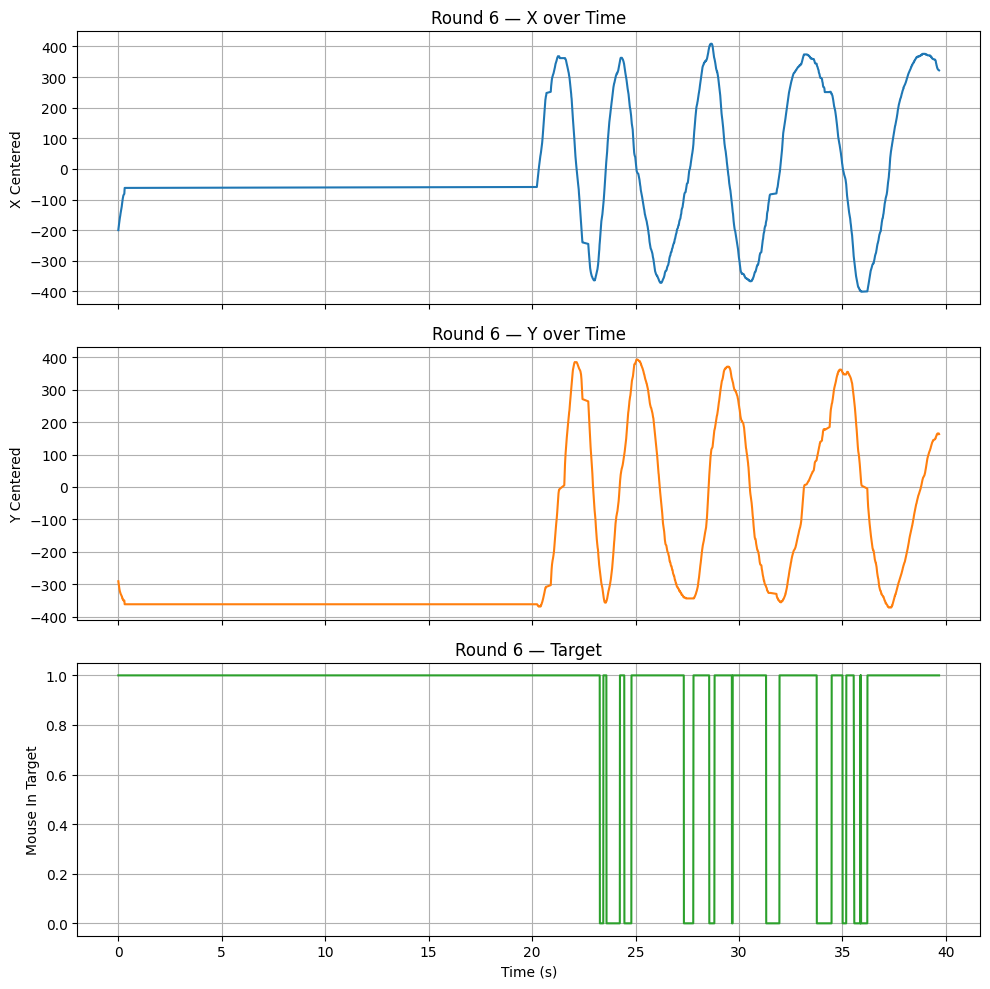

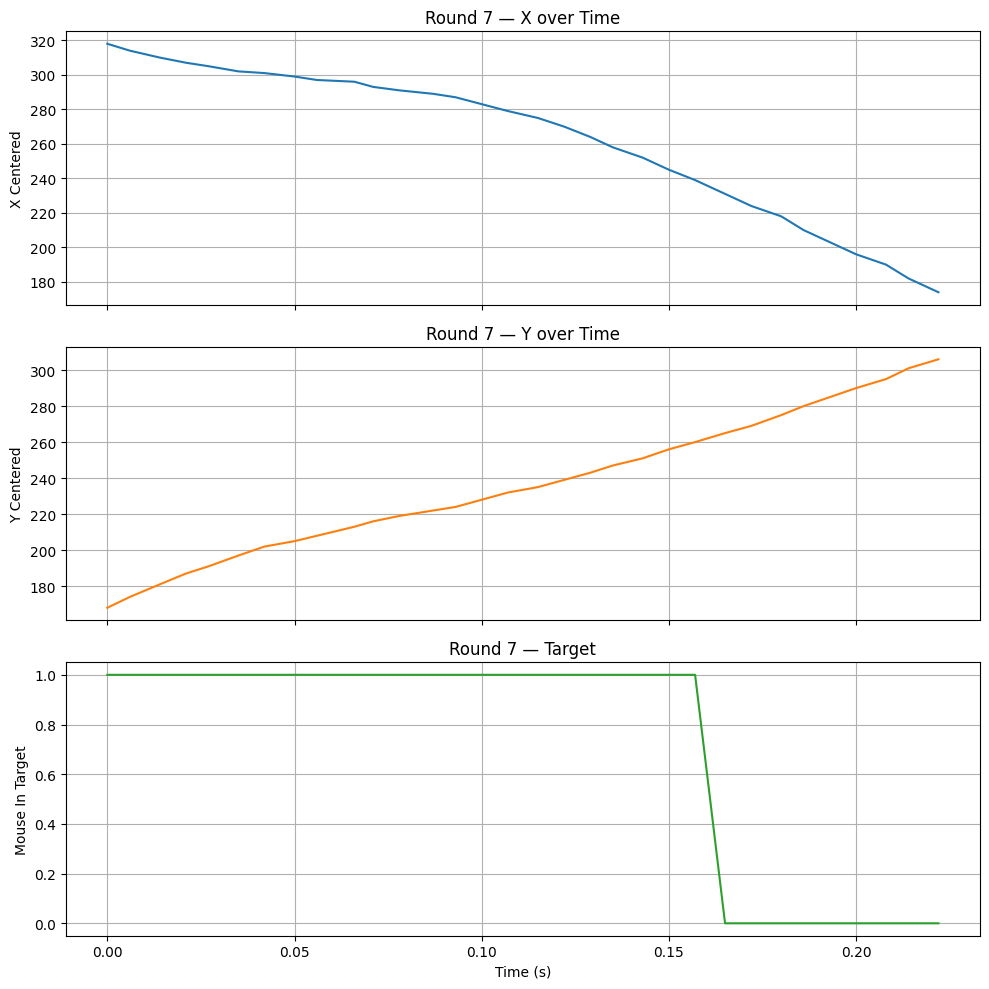

In [25]:
def plot_round(T, X, Y, target, round_number):
    """Plot three stacked subplots for a single round: X, Y (inverted for plotting), and target."""
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

    ax1.plot(T, X, color='tab:blue')
    ax1.set_ylabel('X Centered')
    ax1.set_title(f'Round {round_number} — X over Time')
    ax1.grid(True)

    ax2.plot(T, -Y, color='tab:orange')
    ax2.set_ylabel('Y Centered')
    ax2.set_title(f'Round {round_number} — Y over Time')
    ax2.grid(True)

    ax3.plot(T, target, color='tab:green')
    ax3.set_xlabel('Time (s)')
    ax3.set_ylabel('Mouse In Target')
    ax3.set_title(f'Round {round_number} — Target')
    ax3.grid(True)

    plt.tight_layout()
    plt.show()

# Ensure records exist
if 'records' not in globals():
    records = find_records(timestamp)

for i, (s, e) in enumerate(records, start=1):
    T_rel, Xc_slice, Yc_slice, target_slice = extract_record_times(s, e)
    # plot a 3-panel figure for this record
    plot_round(T_rel, Xc_slice, Yc_slice, target_slice, i)

# Optionally create rounds list for combined plotting later
rounds = [ (T, X, Y, trg) for (T, X, Y, trg) in (extract_record_times(s,e) for s,e in records) ]

## Display the two overall graphs 

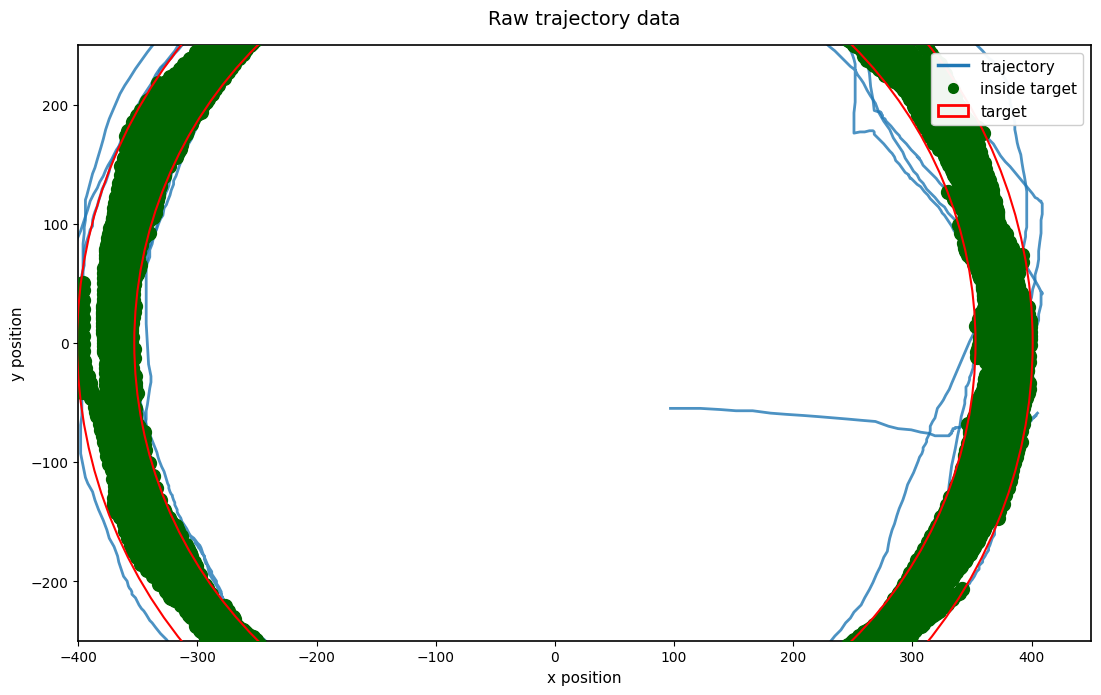

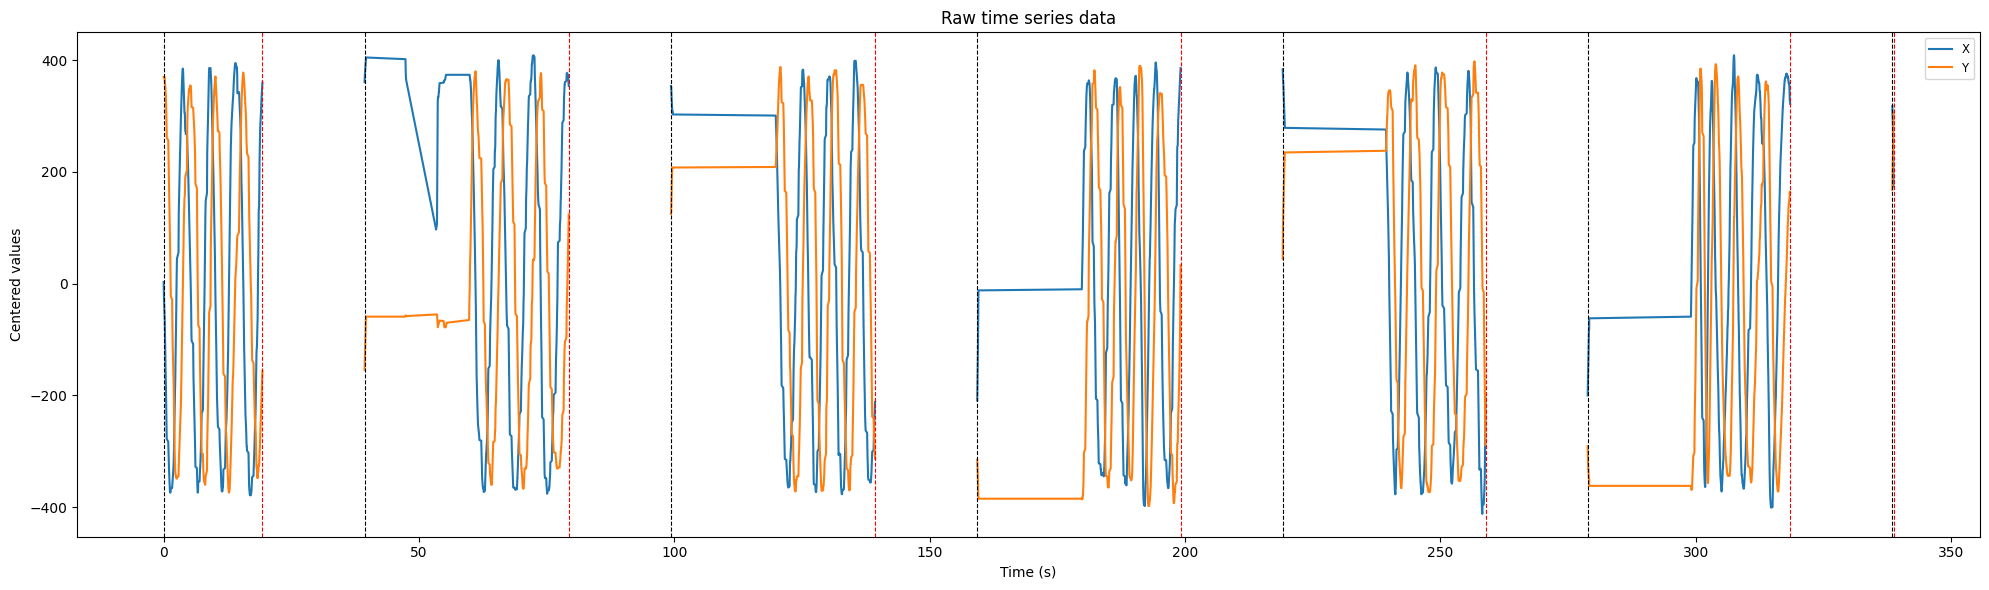

In [26]:
#Circle graph
raw_data = []
try:
    # Use FILE (defined earlier) instead of undefined 'filename'
    with open(FILE, 'r', encoding='utf-8') as f:
        lines = f.readlines()[3:]  # skip header lines
    for line in lines:
        if not line.strip():
            continue
        # detect separator robustly
        sep = ';' if ';' in line else ','
        vals = line.strip().split(sep)
        try:
            # accept decimal comma or point
            t = float(vals[0].replace(',', '.'))
            x = float(vals[1].replace(',', '.'))
            y = float(vals[2].replace(',', '.'))
            it = float(vals[3].replace(',', '.')) if len(vals) > 3 else 0.0
            raw_data.append([t, x, y, it])
        except Exception:
            # skip malformed lines
            continue
except Exception as e:
    print('Warning reading', FILE, ':', e)
    raw_data = []

# Ensure data is a 2D array with shape (N, 4) even when raw_data is empty or malformed
if raw_data:
    data = np.array(raw_data, dtype=float)
    if data.ndim == 1:
        # single row -> reshape to (1, 4) (defensive)
        data = data.reshape(-1, 4)
else:
    data = np.empty((0, 4), dtype=float)

# Filter valid points safely
if data.size == 0:
    valid_points = np.empty((0, 4), dtype=float)
else:
    valid_points = data[(data[:, 1] != 0) | (data[:, 2] != 0)]

# timestamps and record detection (guard against empty)
if valid_points.shape[0] == 0:
    timestamps = np.array([], dtype=float)
else:
    timestamps = valid_points[:, 0]

if timestamps.size > 1:
    jumps = np.where(np.diff(timestamps) > 1000)[0] + 1
    jumps = jumps.tolist()
else:
    jumps = []

boundaries = [0] + list(jumps) + [len(valid_points)]

records = []
for i in range(len(boundaries)-1):
    start = boundaries[i]
    end = boundaries[i+1]
    if (end - start) > 50:
        records.append(valid_points[start:end])

# =============================================================================
# 3. PLOTTING
# =============================================================================
x_min, x_max = -400, 450
y_min, y_max = -250, 250

# Calculate dimensions to maintain aspect ratio
x_range = x_max - x_min
y_range = y_max - y_min
aspect_ratio = y_range / x_range

fig, ax = plt.subplots(figsize=(12, 12 * aspect_ratio))

cx, cy = params.get('centerX', 0), params.get('centerY', 0)
r_ext = params.get('externalRadius', 250) - params.get('cursorRadius', 16)
r_int = params.get('internalRadius', 170) + params.get('cursorRadius', 16)

# 1. Target (Red contour only) - NO offset
c_ext = plt.Circle((0, 0), r_ext, color='red', fill=False, linewidth=1.5, zorder=5)
c_int = plt.Circle((0, 0), r_int, color='red', fill=False, linewidth=1.5, zorder=5)
ax.add_patch(c_ext)
ax.add_patch(c_int)

# 2. Trajectories - NO offset
for rec_data in records:
    x = rec_data[:, 1] - cx
    y = -(rec_data[:, 2] - cy)  # Y inversion only
    target = rec_data[:, 3]
    
    # A. Blue Line (Complete trajectory)
    ax.plot(x, y, color='#1f77b4', linewidth=2, alpha=0.8, zorder=2)
    
    # B. Green Points (Inside Target)
    mask_ok = (target == 1)
    if np.any(mask_ok):
        ax.plot(x[mask_ok], y[mask_ok], 'o', color='darkgreen', markersize=11, 
                markeredgewidth=0, zorder=4)

# 3. Custom Legend
legend_elements = [
    Line2D([0], [0], color='#1f77b4', linewidth=2.5, label='trajectory'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='darkgreen', 
           markersize=8, markeredgewidth=0, label='inside target', linestyle=''),
    patches.Patch(facecolor='none', edgecolor='red', linewidth=2, label='target')
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=11, framealpha=0.95)

# 4. FORMATTING
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

ax.set_aspect('equal')

# Plot border
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.2)

ax.set_title("Raw trajectory data", fontsize=14, pad=15, fontweight='normal')
ax.set_xlabel("x position", fontsize=11)
ax.set_ylabel("y position", fontsize=11)

# Ticks
ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()


#Time position/graph 
# Compute sequential offsets (seconds) with a 20.0s gap between rounds
start_offsets = []
current_offset = 0.0
gap_seconds = 20.0
for T, X, Y, trg in rounds:
    start_offsets.append(current_offset)
    dur = (T[-1] - T[0]) if len(T) > 0 else 0.0
    current_offset += dur + gap_seconds

fig, ax = plt.subplots(figsize=(20, 6))

# fixed colors for all records
color_x = 'tab:blue'
color_y = 'tab:orange'

for idx, ((T, X, Y, trg), offset) in enumerate(zip(rounds, start_offsets), start=1):
    # process_round returns T relative (starts at 0), so add offset
    T_plot = T + offset
    # label only for first round so legend shows single X and Y entries
    x_label = 'X' if idx == 1 else '_nolegend_'
    y_label = 'Y' if idx == 1 else '_nolegend_'

    ax.plot(T_plot, X, color=color_x, label=x_label, alpha=1)
    ax.plot(T_plot, -Y, color=color_y, label=y_label, alpha=1)

    # visual separators for round boundaries
    ax.axvline(offset, color='black', ls='--', lw=0.8)
    ax.axvline(offset + (T[-1] if len(T) else 0.0), color='red', ls='--', lw=0.8)

ax.set_xlabel('Time (s)')
ax.set_ylabel('Centered values')
ax.set_title('Raw time series data')
ax.grid(False)
ax.legend(loc='upper right', fontsize='small')
plt.tight_layout()
plt.show()